<a href="https://colab.research.google.com/github/saitamayagami/first/blob/main/group_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file='/content/drive/MyDrive/dic/capston/Hotel Bookings.csv'

In [ ]:
df=pd.read_csv(file)

# Where do the guests come from ? From which country most guests come


In [ ]:
x=df.country.value_counts()

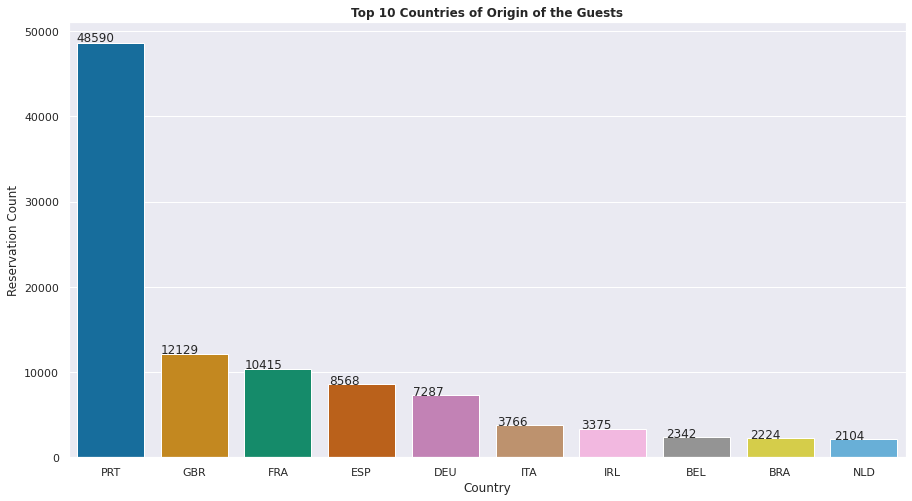

In [ ]:
x=df.country.value_counts()
z=sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')
for p in z.patches:
    z.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#  Which room type is in most demand and which room type generates the highest adr?

In [ ]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
df['room_type']=df['assigned_room_type']

In [ ]:
az=df.room_type.value_counts()

In [ ]:
total=az.sum()

Text(0.5, 1.0, 'most demanded room type')

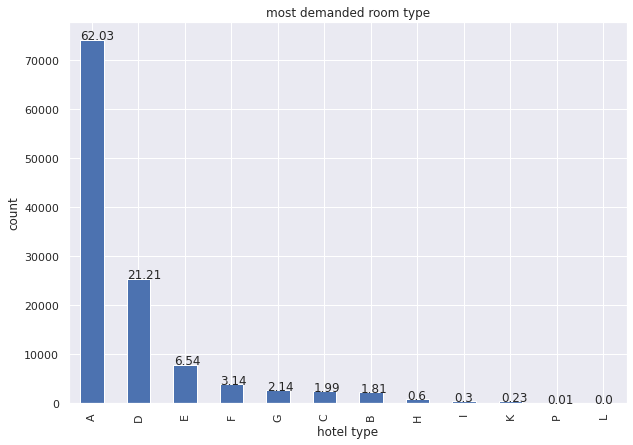

In [ ]:
plt.figure(figsize=(10,7));
ax= az.plot (kind= 'bar');
sum_val=az.sum()
for p in ax.patches:
    ax.annotate(round(((p.get_height()/sum_val)*100),2), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('hotel type')
plt.ylabel('count')
plt.title("most demanded room type")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



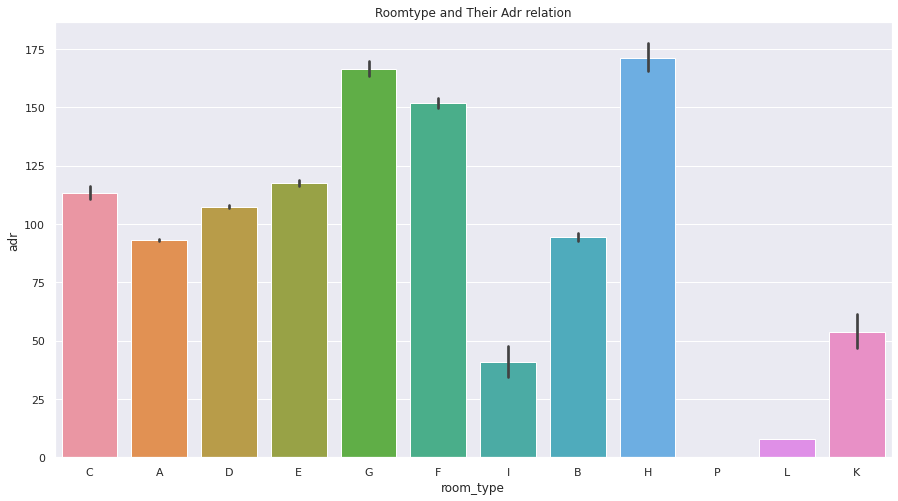

In [ ]:
sns.barplot(df.room_type,df.adr,data=df);
plt.title('Roomtype and Their Adr relation');

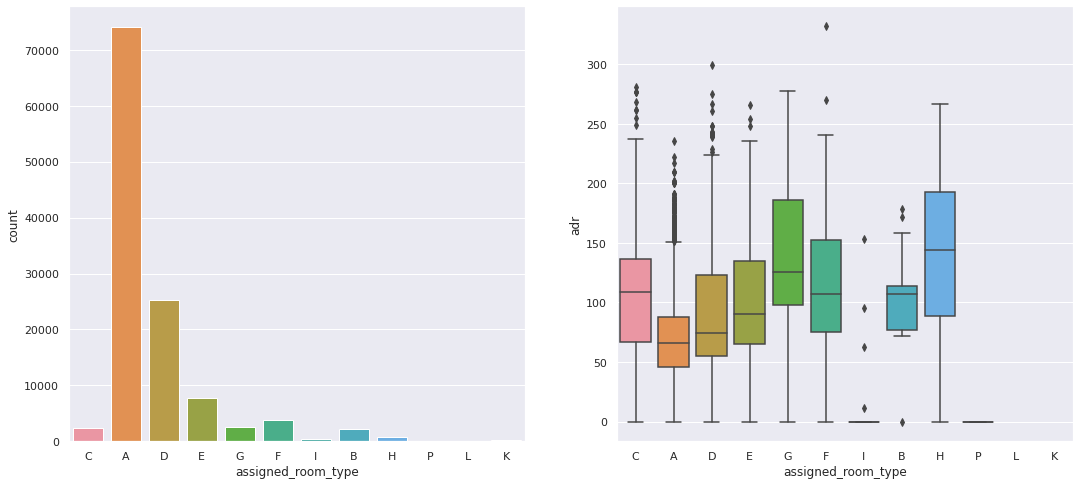

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'][:5000])
plt.show()

#                      **which is the busiest quarter**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



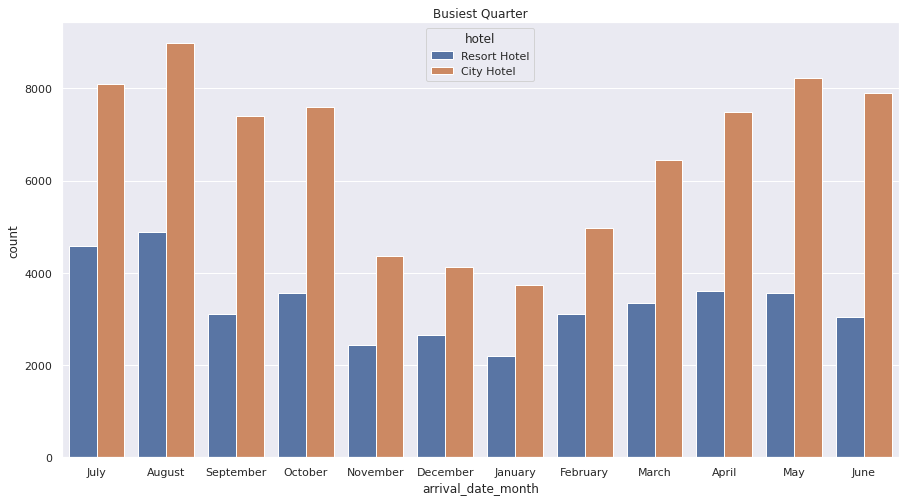

In [ ]:
sns.set(rc={'figure.figsize':(15,8)});
sns.countplot(df.arrival_date_month,data=df,hue=df.hotel);
plt.title('Busiest Quarter');


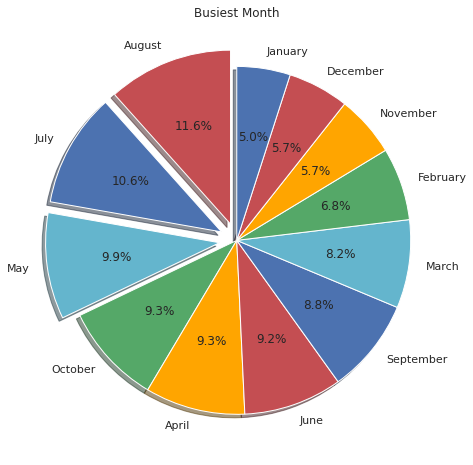

In [ ]:
activities = ['August','July','May','October','April','June','September','March','February',"November",'December','January']
cols = ['r','b','c','g', 'orange']
plt.pie(df.arrival_date_month.value_counts(),
labels =activities,
colors = cols,
startangle = 90,
shadow = True,
explode =(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0),
autopct ='%1.1f%%')
plt.title('Busiest Month')

# Print the chart
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



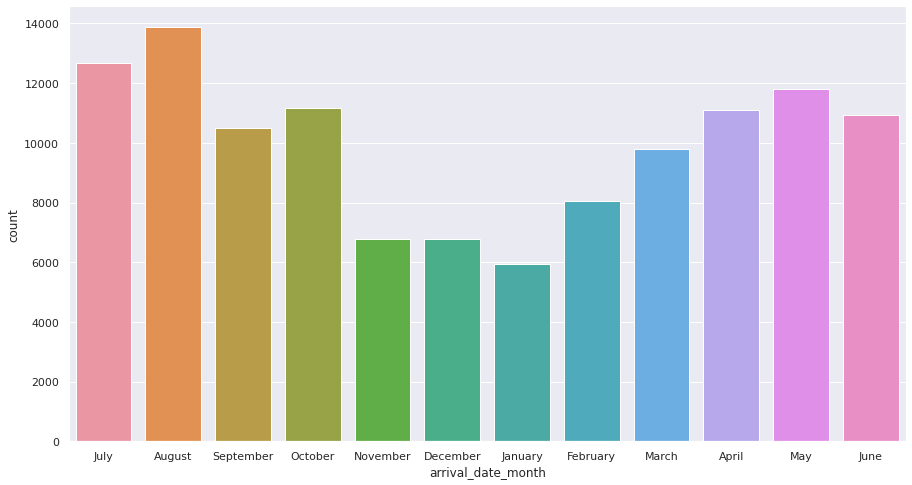

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df.arrival_date_month,data=df);


## **** How does the price per night changes yearly**

In [ ]:
resort_hotel=df[(df['hotel']=='Resort Hotel')&(df['is_canceled']==0)]
City_hotel=df[(df['hotel']=='City Hotel')&(df['is_canceled']==0)]

resort_night=resort_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()

In [ ]:
resort_night

,arrival_date_year,adr
0,2015,89.759424
1,2016,83.906961
2,2017,101.770718


In [ ]:
city_night=City_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()

In [ ]:
city_night

,arrival_date_year,adr
0,2015,87.873431
1,2016,104.079729
2,2017,116.816527


In [ ]:
az=pd.merge(resort_night,city_night,on='arrival_date_year')

In [ ]:
az.columns=['arrival_date_year','Resot_hotel_price','City_hotel_price']

In [ ]:
az

,arrival_date_year,Resot_hotel_price,City_hotel_price
0,2015,89.759424,87.873431
1,2016,83.906961,104.079729
2,2017,101.770718,116.816527


In [ ]:
px.line(az, x = az['arrival_date_year'], y = ['Resot_hotel_price','City_hotel_price'],title='Yearly Night')

# **How does the price per night vary over the year** 

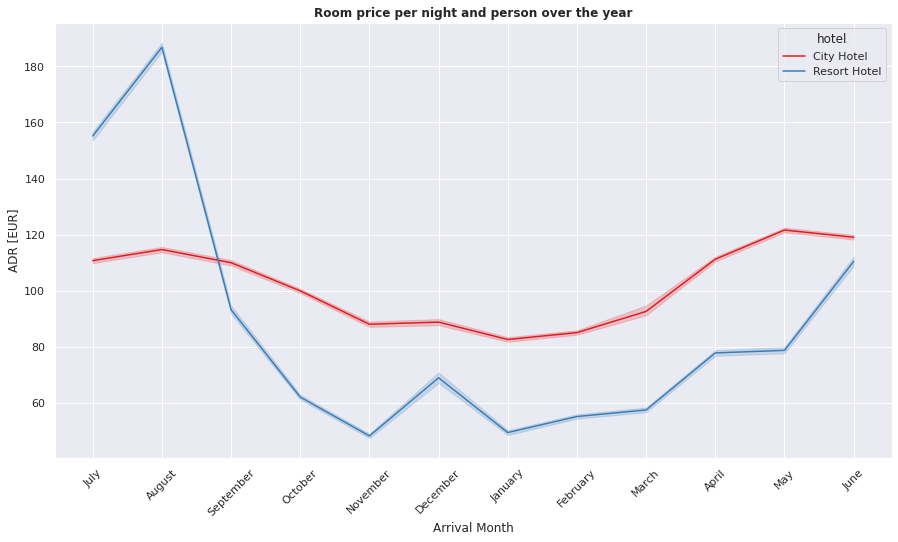

In [ ]:
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

# **Average of bookings were canceled?**

In [ ]:
df["Canceled_bookings"]=df.is_canceled+df.previous_cancellations
booking_canc=df.groupby('hotel')['Canceled_bookings'].describe()
sns.barplot(booking_canc.index,booking_canc['mean']*100);
plt.title('Total Booking Canceled');
plt.ylabel('average');

NameError: ignored

## **how many bookings were canceled per month?**

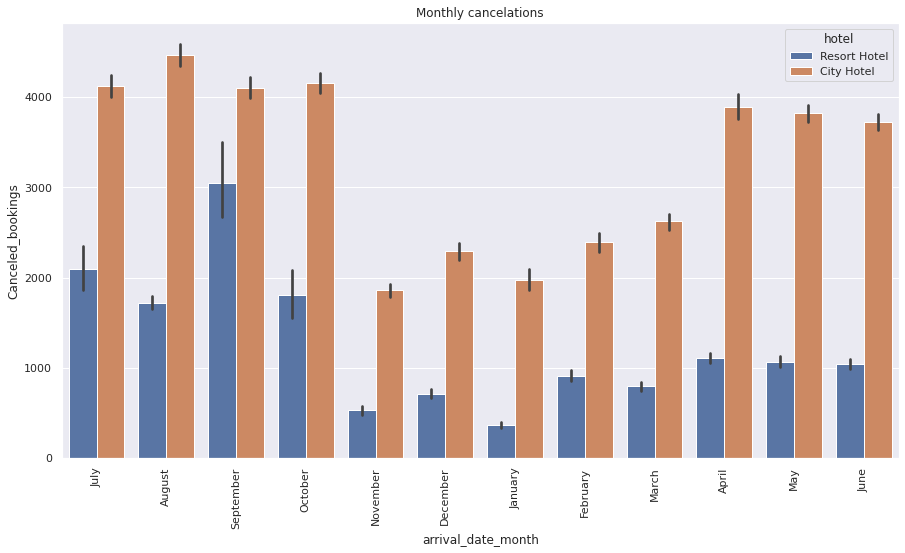

In [ ]:
#df_copy=df[df.Canceled_bookings!=0]
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly cancelations")
sns.barplot(x= 'arrival_date_month', y= 'Canceled_bookings', hue= df['hotel'], estimator= sum, data= df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.Canceled_bookings.value_counts()

0     74624
1     38619
2      5792
3        83
25       48
4        44
27       26
26       25
11       25
5        24
20       19
6        17
15       14
14       11
12       10
7         7
22        1
13        1
Name: Canceled_bookings, dtype: int64

### **Cancelation in percent**

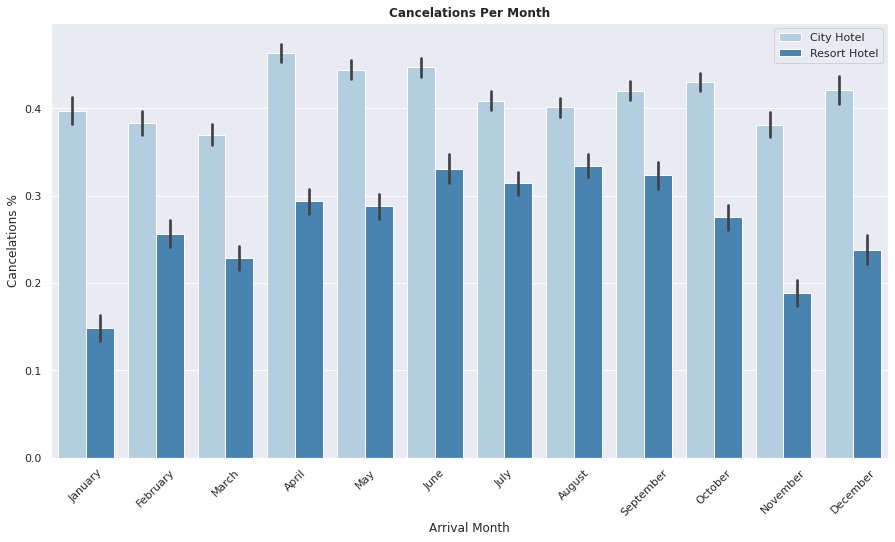

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'Blues')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

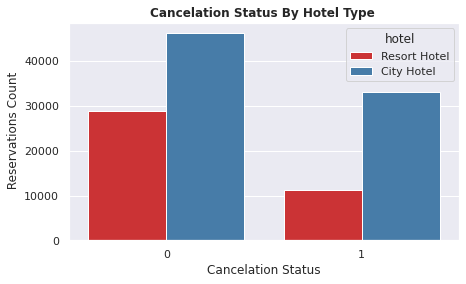

In [ ]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

##  **how long do people stay at the hotels**

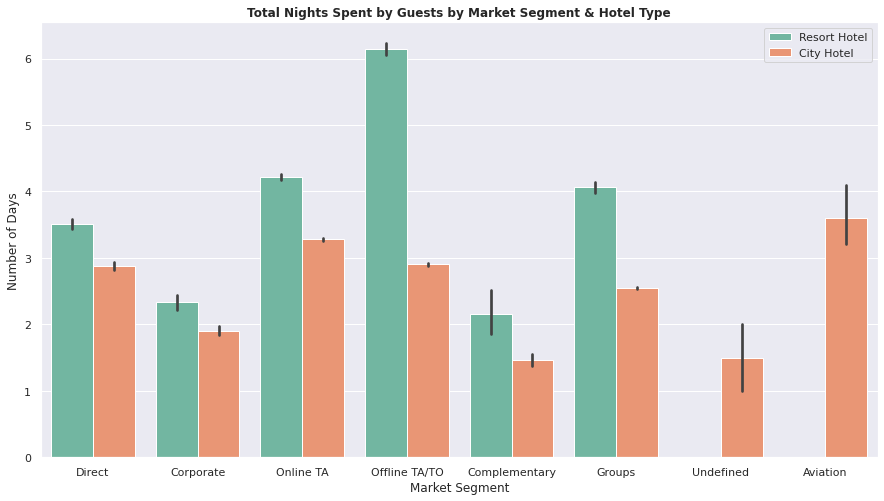

In [ ]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] 
sns.barplot(x = "market_segment", y = "total_stay", data = df, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

## **Distrubiton of Segment by Deposit Type** 

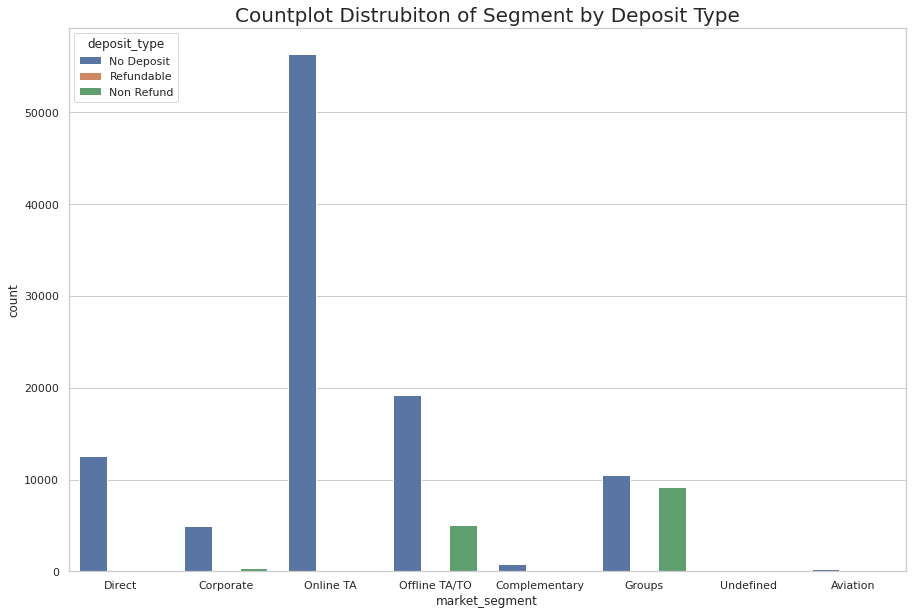

In [ ]:
plt.figure(figsize = (15,10))
sns.set(style = "whitegrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

# **What are the effects of market segment on cancellations?**

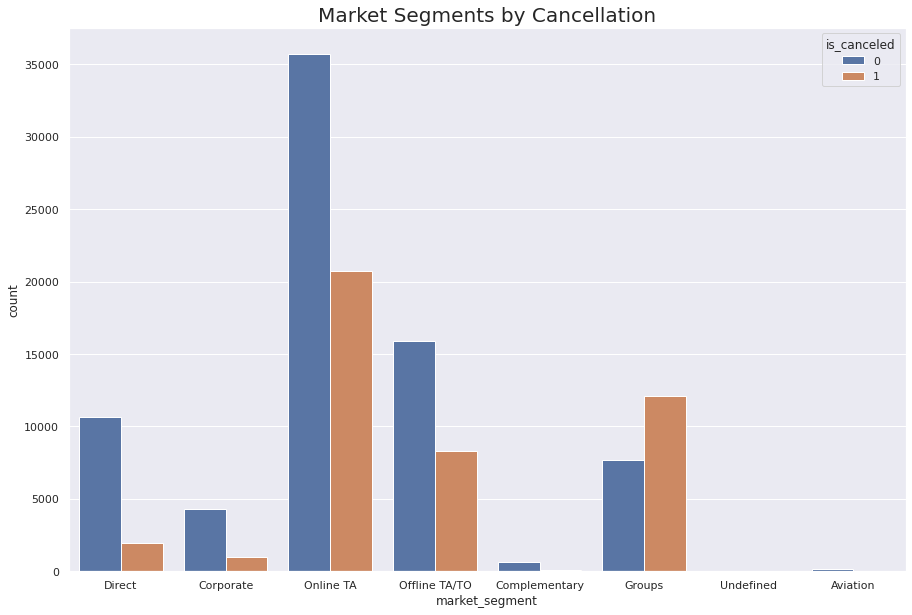

In [ ]:

plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Market Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

## **Effect of Deposit Type on Cancellations**

Text(0, 0.5, 'Reservation Count')

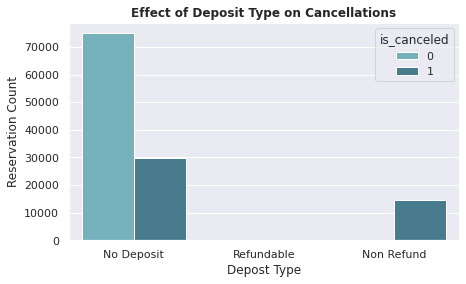

In [ ]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')